# Ejecución condicional

## if - elif - else

In [ ]:
!conda install -c damianavila82 rise

In [ ]:
!pip install hide_code
!jupyter nbextension install --py --sys-prefix hide_code
!jupyter nbextension enable --py --sys-prefix hide_code
!jupyter serverextension enable --py --sys-prefix hide_code

In [ ]:
!pip install blockdiag
!mkdir diag

In [1]:
A = B = B1 = B2 = C = None
condicion = cond1 = cond2 = True
from IPython.display import Image

# Ejecución secuencial

* Normalmente las instrucciones se ejecutan en secuencia

In [2]:
%%file diag/seq.bd
blockdiag {
    default_fontsize = 24
    span_height = 80
    default_node_color = "orange"

    default_fontsize = 24
    A -> B -> C
}

Overwriting diag/seq.bd


In [3]:
!blockdiag diag/seq.bd

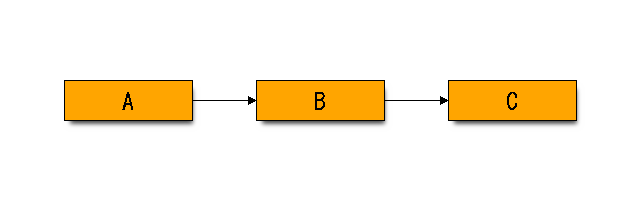

In [4]:
Image("diag/seq.png")

In [299]:
A
B
C

# Ejecución condicional (if)

* If añade un camino alternativo que solo se ejecuta si se cumple una condición

In [5]:
%%file diag/if.bd
blockdiag {
    A -> IF,B -> C
    
    default_fontsize = 24
    span_height = 80
    default_node_color = "orange"
    
    IF[label="Condición", shape="flowchart.condition", width=180, fontsize=20]    
    IF -> B [folded,label="True",fontsize=14]
    IF -> C [label="False",fontsize=14]
    A -> B [style=none]
}

Overwriting diag/if.bd


In [6]:
!blockdiag diag/if.bd

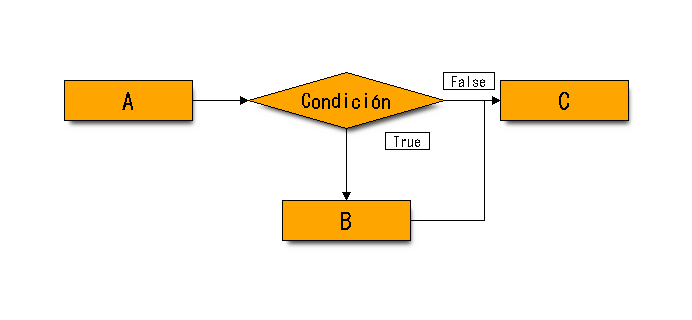

In [7]:
Image("diag/if.png")

In [311]:
A
if condicion:
    B
C

# Ejecución condicional (if-else)

* If-else añade dos caminos alternativos que se ejecutan si se cumple/no se cumple una condición

In [11]:
%%file diag/if-else.bd
blockdiag {
    A -> IF -> B1,B2 -> C
    
    default_fontsize = 24
    default_node_color = "orange"
    
    IF[label="Condición", shape="flowchart.condition", width=180, fontsize=20]    
    
    A -> B1,B2 [style=none]
    //IF -> C [style=none]
    IF -> B1,B2 [fontsize=14]
    IF -> B1 [label="True"]
    IF -> B2 [label="False"]
}

Overwriting diag/if-else.bd


In [12]:
!blockdiag diag/if-else.bd

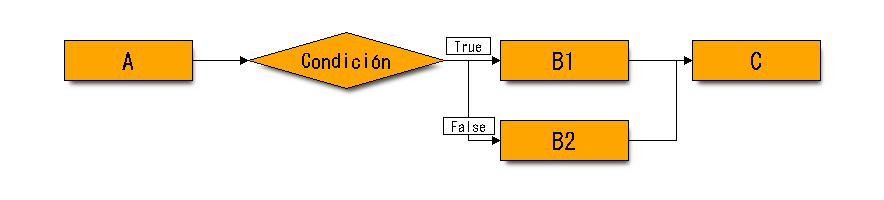

In [13]:
Image("diag/if-else.png")

In [ ]:
A
if condicion:
    B1
else:
    B2
C

# Ejecución condicional múltiple (if-elif-else)

* Las escaleras de if añaden múltiples caminos alternativos.

In [489]:
%%file diag/if-elif-else.bd
blockdiag {
    A -> IF1,IF2,IF3,B
    IF1 -> B1
    IF2 -> B2
    IF3 -> B3
    B1,B2,B3,B -> C
    
    default_fontsize = 24
    default_node_color = "orange"
    
    IF1,IF2,IF3[shape="flowchart.condition", fontsize=20]
    IF1[label="cond1"]
    IF2[label="cond2"]
    IF3,B3[shape="dots"]
    
    A -> IF2,IF3,B [style=none]
    IF1 -> B1
    IF2 -> B2
    IF3 -> B3 [style=none]
    IF1 -> IF2 [folded]
    IF2 -> IF3 [folded]
    IF3 -> B [label="else", folded]
}

Overwriting diag/if-elif-else.bd


In [14]:
!blockdiag diag/if-elif-else.bd

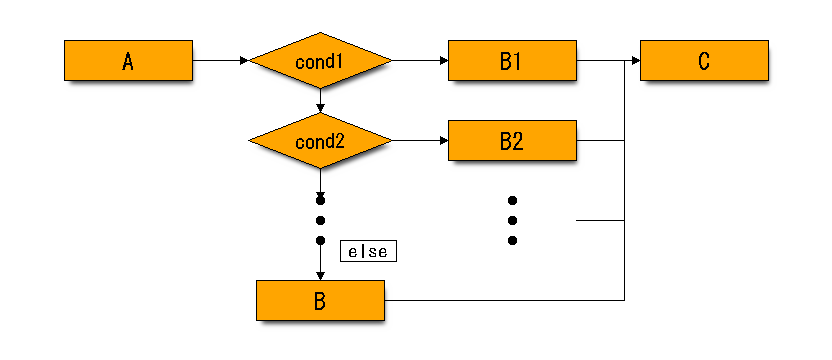

In [15]:
Image("diag/if-elif-else.png")

In [488]:
A
if cond1: B1
elif cond2: B2
else: B
C

# Ejemplo 1

* Escribir una función `calificacion` que devuelva la calificación alfanumérica correspondiente a una calificación numérica.

In [15]:
def calificacion(x):
    if x < 5:
        return "Suspenso"
    if x < 7:
        return "Aprobado"
    if x < 9:
        return "Notable"
    return "Sobresaliente"

# Ejemplo 2

* En EEUU es frecuente un esquema de calificaciones basados en competición entre los estudiantes.  El 20% mejor recibe una A, el 20% siguiente una B, el 20% siguiente un C, el 20% siguiente una D y el 20% peor una F.  Escribir una función `letter_grade` que devuelva la letra correspondiente a un percentil dado.  El percentil es la proporción de estudiantes que tiene un resultado peor que el del alumno.  Por ejemplo, un percentil 1.0 significaría que todos los demás alumnos tienen peor calificación.

In [8]:
def letter_grade(x):
    if x < 0.2:
        return "F"
    if x < 0.4:
        return "D"
    if x < 0.6:
        return "C"
    if x < 0.8:
        return "B"
    return "A"

# Ejemplo 3

* Imprime un mensaje si `n` es divisible por 2 y/o por 3.

In [6]:
def es_divisible_por(n,d): return n % d == 0

n = 1245412

In [7]:
if es_divisible_por(n, 2):
    if es_divisible_por(n, 3):
        print('Divisible por 2 y por 3')
    else:
        print('Divisible por 2 pero no por 3')
elif es_divisible_por(n, 3):
    print('Divisible por 3 pero no por 2')
else:
    print('No divisible por 2 ni por 3')

Divisible por 2 pero no por 3


# Ejemplo 4

* Escribe una función `es_bisiesto` que devuelva `True` cuando el argumento es un año bisiesto y `False` en caso contrario.

In [21]:
def es_bisiesto(x):
    if es_divisible_por(x, 400):
        return True
    if es_divisible_por(x, 100):
        return False
    if es_divisible_por(x, 4):
        return True
    return False

In [23]:
def es_bisiesto(x):
    return es_divisible_por(x, 400) or not es_divisible_por(x, 100) and es_divisible_por(x, 4)